In [1]:
import pandas as pd
from random import randrange
import numpy as np
import matplotlib.pyplot as plt

In [2]:
index_data = pd.read_csv("^VIX.csv")
index_data = index_data.rename(columns = {"Date":"Date",\
                           "Open":"index_open",\
                           "High":'index_high',\
                           'Low':'index_low',\
                           'Close':'index_close',\
                           'Adj Close':'index_adj_close',\
                           'Volume':'index_volume'})

In [3]:
vix_price_data = pd.read_csv('VIXY.csv')
vix_price_data = vix_price_data.rename(columns = {"Date":"Date",\
                           "Open":"vix_price_open",\
                           "High":'vix_price_high',\
                           'Low':'vix_price_low',\
                           'Close':'vix_price_close',\
                           'Adj Close':'vix_price_adj_close',\
                           'Volume':'vix_price_volume'})

In [4]:
total_data = pd.merge(index_data, vix_price_data, on="Date",how = 'inner')

In [5]:
total_data.head()

,Date,index_open,index_high,index_low,index_close,index_adj_close,index_volume,vix_price_open,vix_price_high,vix_price_low,vix_price_close,vix_price_adj_close,vix_price_volume
0,2011-01-04,17.340000,18.240000,17.330000,17.379999,17.379999,0,7914.0,8135.0,7914.0,7923.0,7923.0,1122
1,2011-01-05,17.809999,17.950001,16.860001,17.020000,17.020000,0,8005.0,8010.0,7718.0,7755.0,7755.0,742
2,2011-01-06,16.799999,17.559999,16.790001,17.400000,17.400000,0,7744.0,7868.0,7687.0,7788.0,7788.0,833
3,2011-01-07,17.309999,18.070000,16.570000,17.139999,17.139999,0,7724.0,8001.0,7618.0,7804.0,7804.0,430
4,2011-01-10,18.350000,18.629999,17.540001,17.540001,17.540001,0,7964.0,8087.0,7776.0,7788.0,7788.0,702


In [6]:
total_data.tail()

,Date,index_open,index_high,index_low,index_close,index_adj_close,index_volume,vix_price_open,vix_price_high,vix_price_low,vix_price_close,vix_price_adj_close,vix_price_volume
2611,2021-05-20,22.330000,23.500000,20.190001,20.670000,20.670000,0,8.430000,8.55,8.1000,8.190000,8.190000,16433200
2612,2021-05-21,20.420000,20.889999,19.530001,20.150000,20.150000,0,8.040000,8.19,7.9500,8.080000,8.080000,13541400
2613,2021-05-24,20.500000,20.510000,18.379999,18.400000,18.400000,0,7.920000,7.92,7.6300,7.710000,7.710000,10086900
2614,2021-05-25,18.350000,19.290001,16.870001,18.840000,18.840000,0,7.660000,7.85,7.6500,7.710000,7.710000,9886800
2615,2021-05-26,18.370001,18.920000,17.350000,17.360001,17.360001,0,30.389999,30.49,29.2495,29.389999,29.389999,5681654


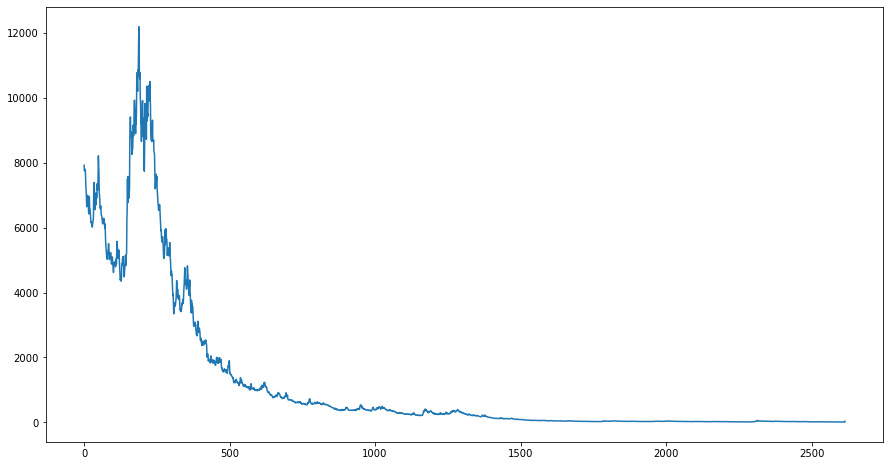

In [7]:
plt.rcParams["figure.figsize"] = (15,8)

plt.plot(total_data['vix_price_adj_close'])
plt.show()

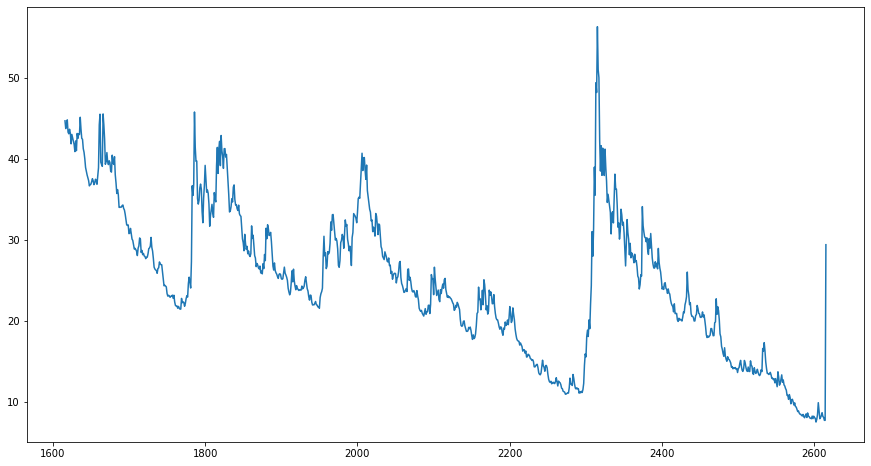

In [8]:
plt.rcParams["figure.figsize"] = (15,8)

plt.plot(total_data['vix_price_adj_close'][-1000:])
plt.show()

In [9]:
#compute the exponential moving average
mv_10 = total_data['index_adj_close'].ewm(span = 10).mean()
mv_20 = total_data['index_adj_close'].ewm(span = 20).mean()
mv_30 = total_data['index_adj_close'].ewm(span = 30).mean()
mv_50 = total_data['index_adj_close'].ewm(span = 50).mean()
mv_100 = total_data['index_adj_close'].ewm(span = 100).mean()


In [10]:
spot_to_mv_10 = total_data['index_adj_close']/mv_10
spot_to_mv_20 = total_data['index_adj_close']/mv_20
spot_to_mv_30 = total_data['index_adj_close']/mv_30
spot_to_mv_50 = total_data['index_adj_close']/mv_50
spot_to_mv_100 = total_data['index_adj_close']/mv_100

In [11]:
vix_measure = spot_to_mv_10+spot_to_mv_20+spot_to_mv_30+spot_to_mv_50+spot_to_mv_100
vix_measure_list = vix_measure.tolist()
print(len(vix_measure_list))

2616


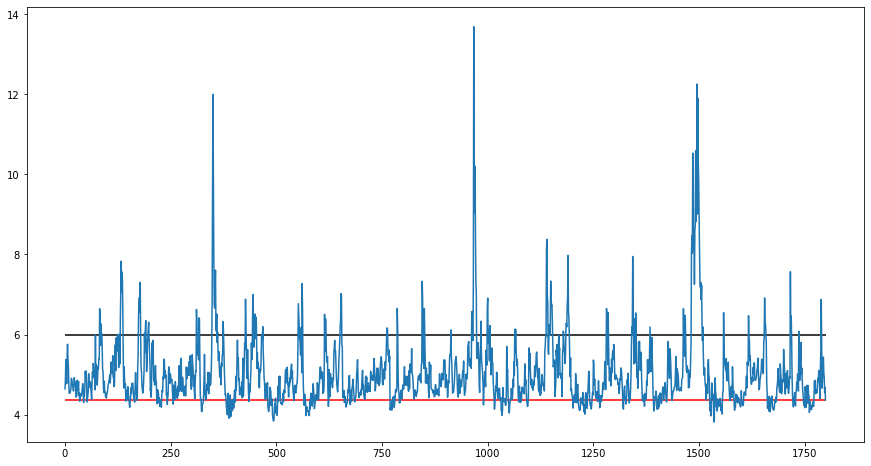

In [12]:
most_recent_days = 1800

plt.rcParams["figure.figsize"] = (15,8)

plt.hlines(6,0,len(vix_measure_list[-1*most_recent_days:]),color = 'black')
plt.hlines(vix_measure_list[-1],0,len(vix_measure_list[-1*most_recent_days:]),color = 'red')

plt.plot(vix_measure_list[-1*most_recent_days:])
plt.show()

In [13]:
#days since above some threshold

threshold = 8
counting_days = []
current_episode = []
current_counter = 0

for time_index in range(len(vix_measure_list)-1,0,-1):

    current_measure = vix_measure_list[time_index]
    previous_measure = vix_measure_list[time_index-1]

    if previous_measure<threshold and current_measure >= threshold:
        current_counter += 1
        current_episode.append(current_counter)
        current_episode = current_episode[::-1]
        for entry in current_episode:
            counting_days.append(entry)
        current_counter = 0
        current_episode = []
    else:
        current_counter += 1
        current_episode.append(current_counter)

current_episode = current_episode[::-1]
for entry in current_episode:
    counting_days.append(entry)


counting_days = counting_days[::-1]

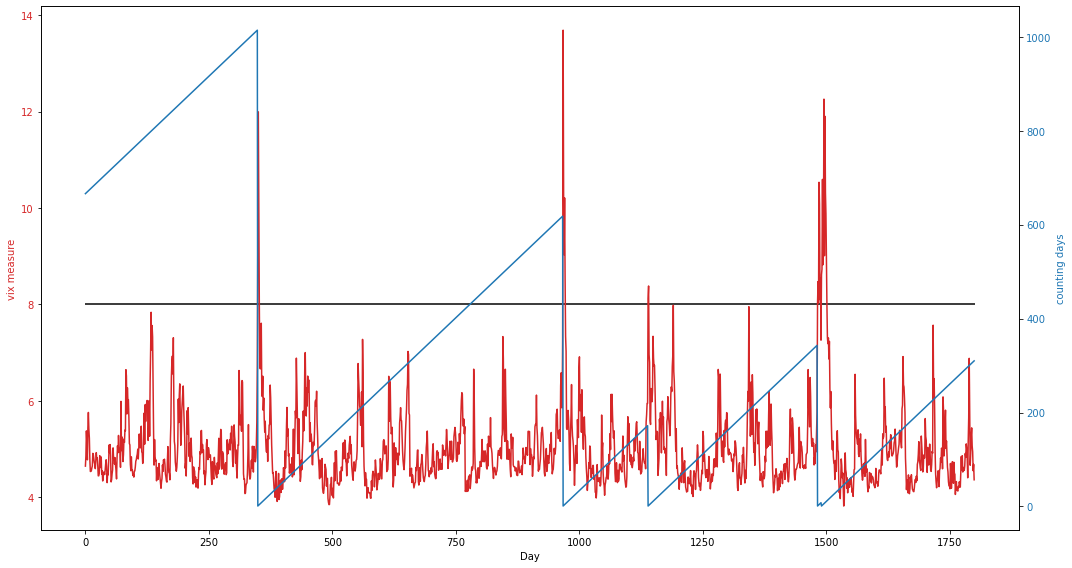

In [14]:
most_recent_days = 1800


plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix measure', color=color)
ax1.plot(vix_measure_list[-1*most_recent_days:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.hlines(threshold,0,len(vix_measure_list[-1*most_recent_days:]),color = 'black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('counting days', color=color)  # we already handled the x-label with ax1
ax2.plot(counting_days[-1*most_recent_days:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
def day_counter_helper(threshold):

    counting_days = []
    current_episode = []
    current_counter = 0

    for time_index in range(len(vix_measure_list)-1,0,-1):

        current_measure = vix_measure_list[time_index]
        previous_measure = vix_measure_list[time_index-1]

        if previous_measure<threshold and current_measure >= threshold:
            current_counter += 1
            current_episode.append(current_counter)
            current_episode = current_episode[::-1]
            for entry in current_episode:
                counting_days.append(entry)
            current_counter = 0
            current_episode = []
        else:
            current_counter += 1
            current_episode.append(current_counter)

    current_episode = current_episode[::-1]
    for entry in current_episode:
        counting_days.append(entry)
    

    counting_days = counting_days[::-1]
    
    return counting_days

In [19]:
index_feature_dataframe = pd.DataFrame()
index_feature_dataframe['vix_price_adj_close'] = total_data['vix_price_adj_close'][1:]
index_feature_dataframe['vix_adj_close'] = total_data['index_adj_close'][1:]
index_feature_dataframe['mv_ratio'] = vix_measure_list[1:]
threshold_list = [5,6,7]
for threshold in threshold_list:
    counting_days = day_counter_helper(threshold)
    index_feature_dataframe['days_since_'+str(threshold)] = counting_days

In [20]:
index_feature_dataframe

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
1,7755.000000,17.020000,4.949885,1,1,1
2,7788.000000,17.400000,5.038309,1,2,2
3,7804.000000,17.139999,4.973451,2,3,3
4,7788.000000,17.540001,5.068068,1,4,4
5,7573.000000,16.889999,4.904395,2,5,5
...,...,...,...,...,...,...
2611,8.190000,20.670000,5.061708,3,7,80
2612,8.080000,20.150000,4.940175,4,8,81
2613,7.710000,18.400000,4.546979,5,9,82
2614,7.710000,18.840000,4.680220,6,10,83


In [21]:
index_feature_dataframe.iloc[-1000:]

,vix_price_adj_close,vix_adj_close,mv_ratio,days_since_5,days_since_6,days_since_7
1616,44.680000,10.390000,4.723398,15,15,148
1617,43.720001,10.160000,4.637249,16,16,149
1618,44.320000,10.700000,4.881131,17,17,150
1619,44.799999,11.460000,5.196037,1,18,151
1620,43.279999,10.420000,4.737496,2,19,152
...,...,...,...,...,...,...
2611,8.190000,20.670000,5.061708,3,7,80
2612,8.080000,20.150000,4.940175,4,8,81
2613,7.710000,18.400000,4.546979,5,9,82
2614,7.710000,18.840000,4.680220,6,10,83


In [22]:
from sympy.solvers import solve
from sympy import Symbol

value_in_stock = 80
cash = 10

x = Symbol('x')

r = solve((value_in_stock-x)/(value_in_stock-x+cash)-0.5 , x)

In [23]:
r

[70.0000000000000]